In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-06-10 15:06:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-06-10 15:06:50 (76.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length = max_sequence_len))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 11, 128)           411008    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 11, 400)           526400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 400)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               400800    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,817,679
Trainable params: 6,817,679
Non-trainable params: 0
____________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 16s 33ms/step - loss: 6.9752 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 16s 33ms/step - loss: 6.5063 - accuracy: 0.0213
Epoch 3/100
484/484 [==============================] - 16s 33ms/step - loss: 6.4054 - accuracy: 0.0257
Epoch 4/100
484/484 [==============================] - 16s 33ms/step - loss: 6.2781 - accuracy: 0.0292
Epoch 5/100
484/484 [==============================] - 16s 33ms/step - loss: 6.1720 - accuracy: 0.0372
Epoch 6/100
484/484 [==============================] - 16s 33ms/step - loss: 6.0758 - accuracy: 0.0393
Epoch 7/100
484/484 [==============================] - 16s 33ms/step - loss: 5.9784 - accuracy: 0.0403
Epoch 8/100
484/484 [==============================] - 16s 33ms/step - loss: 5.8740 - accuracy: 0.0467
Epoch 9/100
484/484 [==============================] - 16s 33ms/step - loss: 5.7511 - accuracy: 0.0550
Epoch 10/100
484/484 [==============================] - 16s 33ms/step - l

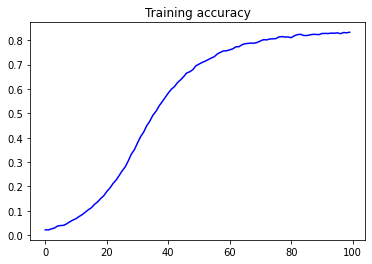

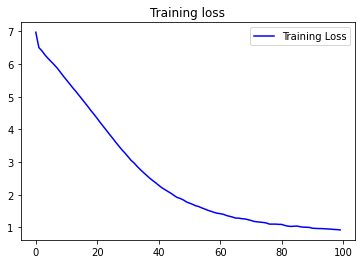

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope new confined end go days hate sight must light live away to give back assured their hate skill rare light behind pleasure rest torn night 'will must must must more rare on rare stay rest near rent lack hate 'no ' behind pleasure so old dumb men none prove you must best best kind must more bright must kind must ride sit exceeds taken behind hate behind disgrace night hate of his face must lie so dead must dead wrong part dearer wrong rhyme cherish sit about taken hate state behind away thine eyes then now his due are must
